# ConvertCamperDataset

## Import

In [26]:
import os
import cv2
import numpy as np
import json
import pandas
import matplotlib.pyplot as plt

## Config

In [27]:
CONFIG = {
    'PATH_ROOT' : '/opt/ml/input/data/camper-dataset/',
    'NAME_ANNOTATION' : 'annotation.json', 
    'NAME_ANNOTATION_RESULT' : 'ufo/train.json',
}

In [28]:
path_annotation = os.path.join(CONFIG['PATH_ROOT'], CONFIG['NAME_ANNOTATION'])
path_annotation_result = os.path.join(CONFIG['PATH_ROOT'], CONFIG['NAME_ANNOTATION_RESULT'])

## Load Json

In [29]:
with open(path_annotation) as json_file:
  file_contents = json_file.read()
annotation_json = json.loads(file_contents)

## Convert

In [30]:
drop_images = []
for img_name in annotation_json['images']:
    if len(annotation_json['images'][img_name]['words'].keys()) < 1:
        drop_images.append(img_name)
        continue
    for bbox_name in annotation_json['images'][img_name]['words']:
        points = annotation_json['images'][img_name]['words'][bbox_name]['points']
        # if len(points) > 4:
        m = np.array(points, np.float32)
        p = cv2.boxPoints(cv2.minAreaRect(m)).tolist()
        annotation_json['images'][img_name]['words'][bbox_name]['points'] = p
for img_name in drop_images:
    print(img_name, ' has been dropped bacause no words.')
    annotation_json['images'].pop(img_name)
        
  

20190608_214923.jpg  has been dropped bacause no words.
20200709_164515.jpg  has been dropped bacause no words.
20200711_035400.jpg  has been dropped bacause no words.
20210914_091031.jpeg  has been dropped bacause no words.
20210914_091624.jpeg  has been dropped bacause no words.
20210915_141507.jpeg  has been dropped bacause no words.
20210915_150130.jpeg  has been dropped bacause no words.


## Save

In [31]:
os.makedirs(os.path.join(CONFIG['PATH_ROOT'], 'ufo'), exist_ok=True)
with open(path_annotation_result, "w") as json_file:
  json.dump(annotation_json, json_file)

## Verify

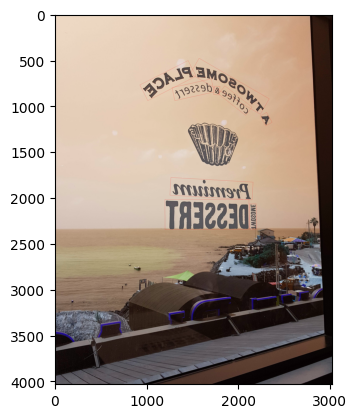

In [32]:
img_name = '20180728_142342.jpg'#sorted(annotation_json['images'].keys())[28]
img_dict = annotation_json['images'][img_name]
img = cv2.imread(os.path.join(CONFIG['PATH_ROOT'], 'images/', img_name))
for name in img_dict['words']:
    points = img_dict['words'][name]['points']
    points = np.array(points,np.int32)
    cv2.drawContours(img, [points],0,(255,0,0))
plt.imshow(img)